Check dukemtmc-reid dataset:

Reference: "taken down"

Statistics:
- identities: 1404 (train + query)
- images: 16522 (train) + 2228 (query) + 17661 (gallery)
- cameras: 8

Directories:
- `bounding_box_test`: 17661 images
- `bounding_box_train`: 16522 images
- `query`: 2228 images

Naming Rules: (example `0001_c1_f0000000.jpg`)
- `c1` is the first camera (totally 8 cameras).
- The last two digts, are the bbox number for DPM detector.

In [1]:
%cd ..

/home/ubuntu/dev/reid/pepper


In [2]:
# builtin
from collections import defaultdict
import os.path as osp
import re

# third-party
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

# mm
import mmcv

In [4]:
train_path = "data/dukemtmc-reid/DukeMTMC-reID/bounding_box_train"
query_path = "data/dukemtmc-reid/DukeMTMC-reID/query"
gallery_path = "data/dukemtmc-reid/DukeMTMC-reID/bounding_box_test"

assert osp.exists(train_path)
assert osp.exists(query_path)
assert osp.exists(gallery_path)

In [5]:
def parse_dukemtmcreid(image_paths):
    
    pattern = re.compile(r"([-\d]+)_c(\d)")
    
    persons = defaultdict(list)
    
    def _split(path):
        _pid, _camid = map(int, pattern.search(path).groups())
        return _pid, _camid
    
    for img_path in image_paths:
        pid, camid = _split(img_path)
        
        persons[pid].append(
            dict(
                camid=camid,
                path=img_path,
            )
        )
            
    return dict(persons)

In [6]:
train_data = parse_dukemtmcreid(mmcv.scandir(train_path, ".jpg"))
gallery_data = parse_dukemtmcreid(mmcv.scandir(gallery_path, ".jpg"))
query_data = parse_dukemtmcreid(mmcv.scandir(query_path, ".jpg"))

In [7]:
# basic stats:
print('#ids for train, query, gallery')
print(len(train_data.keys()), len(query_data.keys()), len(gallery_data.keys()))
# check if we have the appropriate number of ids:
print('number of different identities (train, query)', len(set(train_data.keys()) - set(query_data.keys())))
print('number of different identities (train, gallery)', len(set(train_data.keys()) - set(gallery_data.keys())))
print('number of different identities (query, gallery)', len(set(gallery_data.keys()) - set(query_data.keys())))
print(set(gallery_data.keys()) - set(query_data.keys()))

#ids for train, query, gallery
702 702 1110
number of different identities (train, query) 702
number of different identities (train, gallery) 702
number of different identities (query, gallery) 408
{2, 3, 4, 6148, 6146, 7, 6147, 9, 10, 6155, 12, 11, 6158, 6151, 6156, 6161, 6164, 6166, 6172, 6176, 6178, 6179, 6180, 6185, 6188, 6189, 6191, 6195, 6196, 6198, 6199, 6202, 6204, 6205, 6208, 6210, 6212, 6213, 6214, 6215, 6216, 6219, 6220, 6223, 6224, 6225, 6227, 6230, 6235, 6236, 6244, 6246, 6247, 6252, 6253, 6255, 6257, 6258, 6259, 6262, 6263, 6264, 6269, 6271, 6277, 6279, 6281, 141, 6285, 6287, 6290, 6291, 6296, 6297, 6299, 6301, 4256, 164, 6319, 6320, 6328, 6331, 6337, 6338, 6339, 6340, 6342, 6344, 6345, 6347, 6348, 6351, 6352, 6353, 6355, 6356, 6357, 4309, 6359, 6362, 6365, 6366, 4319, 6367, 6369, 6368, 6370, 6371, 6376, 6377, 6389, 6391, 6393, 6396, 6397, 6398, 6399, 6400, 6402, 6403, 6406, 6407, 6408, 6410, 6412, 6414, 6415, 6416, 6422, 6423, 6429, 6433, 6439, 6440, 6441, 6446, 6447, 64

We can see that some query ids are not in the gallery and vice-versa.
These are distractors and in -video dataset, they say there are 408 identities.

In [8]:
# checks:
def count_total_imgs(data):
    tot = 0
    for pid, inst in data.items():
        tot += len(inst)
    return tot

In [10]:
assert count_total_imgs(train_data) == 16522
assert count_total_imgs(query_data) == 2228
assert count_total_imgs(gallery_data) == 17661

Dataset statistics:

In [11]:
def gen_pid_counts(data):
    pids = [str(i) for i in list(data.keys())]
    counts = []
    for pid in pids:
        td = data[int(pid)]
        counts.append(len(td))
    
    return pids, counts

                1
count  702.000000
mean    23.535613
std     22.674733
min      6.000000
25%     15.000000
50%     20.000000
75%     26.000000
max    426.000000


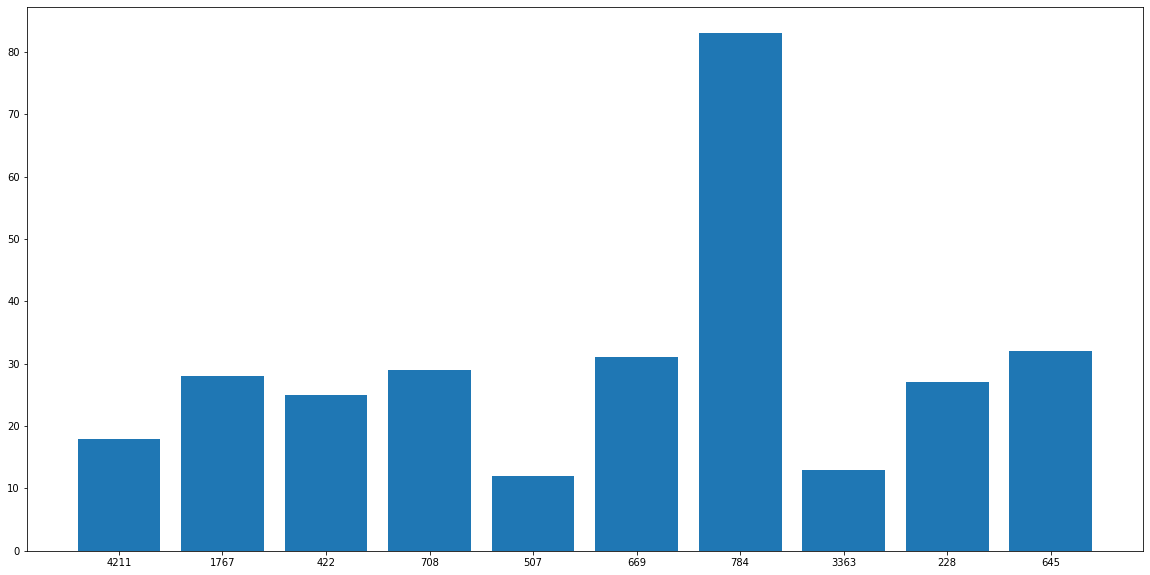

In [12]:
pids, counts = gen_pid_counts(train_data)

df = pd.DataFrame(list(zip(pids, counts)))
print(df.describe())

fig = plt.figure(figsize=(20, 10))
plt.bar(pids[:10], counts[:10])
plt.show()

                 1
count  1110.000000
mean     15.910811
std      24.118137
min       2.000000
25%       6.000000
50%      13.000000
75%      19.000000
max     389.000000


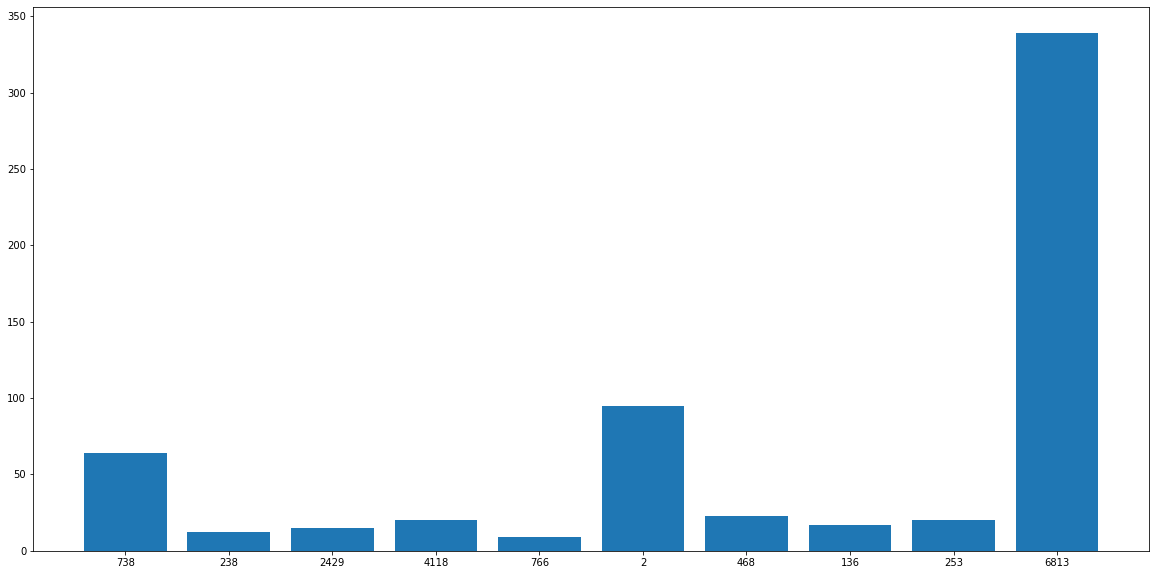

In [13]:
pids, counts = gen_pid_counts(gallery_data)

df = pd.DataFrame(list(zip(pids, counts)))
print(df.describe())

fig = plt.figure(figsize=(20, 10))
plt.bar(pids[:10], counts[:10])
plt.show()

                1
count  702.000000
mean     3.173789
std      0.838446
min      2.000000
25%      3.000000
50%      3.000000
75%      4.000000
max      5.000000


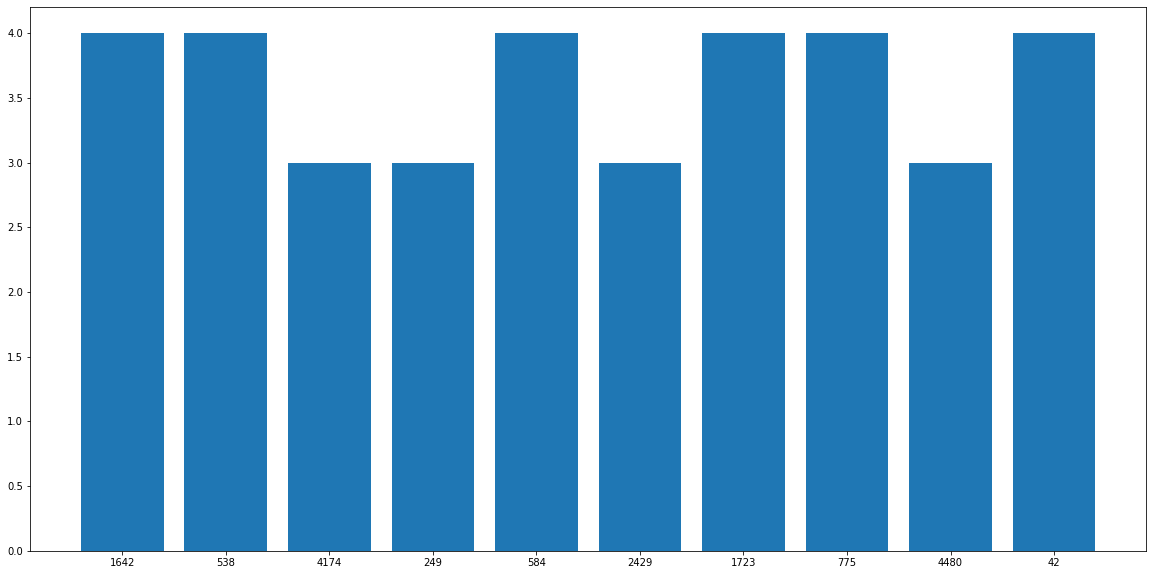

In [14]:
pids, counts = gen_pid_counts(query_data)

df = pd.DataFrame(list(zip(pids, counts)))
print(df.describe())

fig = plt.figure(figsize=(20, 10))
plt.bar(pids[:10], counts[:10])
plt.show()

In [18]:
def parse_dukemtmcreid_2(image_paths):
    
    pattern = re.compile(r"([-\d]+)_c(\d)")
    
    persons = []
    
    def _split(path):
        _pid, _camid = map(int, pattern.search(path).groups())
        return _pid, _camid
    
    for img_path in image_paths:
        pid, camid = _split(img_path)
        
        persons.append(
            dict(
                pid=pid,
                camid=camid,
                path=img_path,
            )
        )
            
    return persons

In [19]:
train_data = parse_dukemtmcreid_2(mmcv.scandir(train_path, ".jpg"))
gallery_data = parse_dukemtmcreid_2(mmcv.scandir(gallery_path, ".jpg"))
query_data = parse_dukemtmcreid_2(mmcv.scandir(query_path, ".jpg"))

In [21]:
train_pids = set([d['pid'] for d in train_data])
gallery_pids = set([d['pid'] for d in gallery_data])
query_pids = set([d['pid'] for d in query_data])